In [1]:
import math
import pandas as pd

def choose(n,r):
    f = math.factorial
    return f(n) // f(r) // f(n-r)


def crossmatchdist(bigN,n):
    if (bigN%2 == 1):
        return "The number of subjects, bigN, should be even"
    I = int(bigN/2)
    df = pd.DataFrame(index = [1,2,3,4])
    dist = df
    for a1 in range(0,I+1):
#             print("a1 loop : ",a1)
            a2 = (n-a1)/2
            if ((math.floor(a2)==a2)&(a2>=0)):
                    a0 = I-(a1+a2)
                    if (a0>=0):
                            pr = math.factorial(I)/choose(bigN,n)
#                             print("a0 : ",a0)
#                             print("a1 : ",a1)
#                             print("a2 : ",a2)
#                             print("pr : ",pr)
                            pr = pr*(2**a1)/(math.factorial(a0)*math.factorial(a1)*math.factorial(a2))
#                             print("a0 : ",a0)
#                             print("a1 : ",a1)
#                             print("a2 : ",a2)
#                             print("pr : ",pr)
                            list1 = [[a0],[a1],[a2],[pr]]
#                             print(list1)
                            dist = pd.concat([dist,pd.DataFrame(list1)],axis=1)
                            
                    
            
    #dist<-rbind(dist,cumsum(dist[4,]))
    dist.loc[4] = dist.loc[3].cumsum()
    return dist.to_numpy()

def crossmatchdist_df(bigN,n):
    if (bigN%2 == 1):
        return "The number of subjects, bigN, should be even"
    I = int(bigN/2)
    df = pd.DataFrame(index = [1,2,3,4])
    dist = df
    for a1 in range(0,I+1):
#             print("a1 loop : ",a1)
            a2 = (n-a1)/2
            if ((math.floor(a2)==a2)&(a2>=0)):
                    a0 = I-(a1+a2)
                    if (a0>=0):
                            pr = math.factorial(I)/choose(bigN,n)
#                             print("a0 : ",a0)
#                             print("a1 : ",a1)
#                             print("a2 : ",a2)
#                             print("pr : ",pr)
                            pr = pr*(2**a1)/(math.factorial(a0)*math.factorial(a1)*math.factorial(a2))
#                             print("a0 : ",a0)
#                             print("a1 : ",a1)
#                             print("a2 : ",a2)
#                             print("pr : ",pr)
                            list1 = [[a0],[a1],[a2],[pr]]
#                             print(list1)
                            dist = pd.concat([dist,pd.DataFrame(list1)],axis=1)
                            
                    
            
    #dist<-rbind(dist,cumsum(dist[4,]))
    dist.loc[4] = dist.loc[3].cumsum()
    return dist





In [140]:
# Testing of the crossmatchdist function by creating files with the python function and comparing them
# by files already created by the original R function

for h in range(0,101):
    if(h%2 == 0):
        for k in range(0,h):

            py_bigN = h
            py_n = k
            result = crossmatchdist_df(py_bigN,py_n)
            #print(result)
            #np.savetxt("mat_python_0_0.csv", result, delimiter=",")
            result.to_csv(f'C:/Users/Eric Aragundi/Desktop/crossmatch test python/mat_python_{py_bigN}_{py_n}.csv',index=False, header=False)

            from numpy import genfromtxt
            f = genfromtxt(f"C:/Users/Eric Aragundi/Desktop/crossmatch test python/mat_python_{py_bigN}_{py_n}.csv", delimiter=',')
            g = genfromtxt(f'C:/Users/Eric Aragundi/Desktop/crossmatch test r/Mat_{py_bigN}_{py_n}.csv', delimiter=',')

#             print(f)
#             print(g)
            #print(f"testing files with BigN = {py_bigN} and {py_n} ")

            # np.array_equal(f, g)
            diff_count = 0
            if(len(f.shape) == 1):
                for i in range(0,len(f)):
                    if(abs(f[i] - g[i]) > 0.000001):
                        print("there is a difference between f: ", f[i]," and ",g[i])
                        diff_count += 1
            else:    
                for i in range(0,len(f)):
                    for j in range(0,len(f[i])):
                        if(abs(f[i][j] - g[i][j]) > 0.000001):
                            print("there is a difference between f: ", f[i][j]," and ",g[i][j])
                            diff_count += 1

            if(diff_count > 0):
                print(f"testing files with BigN = {py_bigN} and {py_n} ")
                print("Arrays are not equal\n")
#             else:
#                 print("Arrays are equal!\n")

testing files with BigN = 2 and 0 
testing files with BigN = 2 and 1 
testing files with BigN = 4 and 0 
testing files with BigN = 4 and 1 
testing files with BigN = 4 and 2 
testing files with BigN = 4 and 3 
testing files with BigN = 6 and 0 
testing files with BigN = 6 and 1 
testing files with BigN = 6 and 2 
testing files with BigN = 6 and 3 
testing files with BigN = 6 and 4 
testing files with BigN = 6 and 5 
testing files with BigN = 8 and 0 
testing files with BigN = 8 and 1 
testing files with BigN = 8 and 2 
testing files with BigN = 8 and 3 
testing files with BigN = 8 and 4 
testing files with BigN = 8 and 5 
testing files with BigN = 8 and 6 
testing files with BigN = 8 and 7 
testing files with BigN = 10 and 0 
testing files with BigN = 10 and 1 
testing files with BigN = 10 and 2 
testing files with BigN = 10 and 3 
testing files with BigN = 10 and 4 
testing files with BigN = 10 and 5 
testing files with BigN = 10 and 6 
testing files with BigN = 10 and 7 
testing file

In [122]:
#crossmatch test function R
## crossmatch test
## z is binary vector indicating the group
## D is a distance matrix of covariates

# library(crossmatch)

# crossmatchtest <- function(z,D)
#   {
#   if ( !isSymmetric(D) )
#     {
#     stop("Invalid distance matrix: your distance matrix is not symmetric")
#     return(NA)
#     }
#   if ( sum(D < 0 ) > 0 )
#     {
#     stop("Invalid distance matrix: your distance matrix includes negative values")
#     return(NA)
#     }
#   print("testing 1:")
#   print(max(as.vector(D)))
  
#   plainmatrix <- 100000*D/max(as.vector(D))
  
#   print("plainmatrix :")
#   print(plainmatrix)
  
#   diag(plainmatrix) <- 0
#   mdm <- distancematrix(plainmatrix)
#   nzero <- sum(mdm==0) - length(diag(mdm))
#   if (nzero/((dim(mdm)[1])^2-dim(mdm)[1])>.95)
#     {
#     warning("Your distance matrix has some very large relative distances such that more than 95 percent of distances were rounded to zero")
#     }
#   res <- nonbimatch(mdm)
#   mt <- pmin(as.numeric(res$matches$Group1.Row),as.numeric(res$matches$Group2.Row))
#   if ( length(z) < length(mt) ) ##if the number of observations is odd remove observation that paired with ghost
#     {
#     mt[ mt==mt[length(mt)] ] <- 0
#     mt <- mt[1:(length(mt)-1)]
#     }
#   z0 <- z[mt>0]
#   mt0 <- factor(mt[mt>0])
#   tab <- table(factor(z0),mt0)
#   a1 <- sum(tab[1,]==1)
#   bigN <- length(z0)
#   n <- sum(z0)
#   if (bigN<340) ##if the number of observations is below 340 compute the exact null distribution
#     {
#     dist <- crossmatchdist(bigN,n)
#     pval <- dist[5,dist[2,]==a1]
#     }
#   else
#     {
#     pval<-NA
#     }
#   m <- bigN-n
#   Ea1 <- (n*m/(bigN-1))
#   Va1 <- 2*n*(n-1)*m*(m-1)/((bigN-3)*(bigN-1)*(bigN-1))
#   dev <- (a1-Ea1)/sqrt(Va1)
#   approx <- pnorm(dev)
#   list (a1=a1,Ea1=Ea1,Va1=Va1,dev=dev,pval=pval,approxpval=approx)
#   }

# M <- matrix(c(1,2,2,1),2)
# vec <- c(0,1)

# print("matrix input : ")
# print(M)
# crossmatchtest(vec,M)

[0. 0. 0. 1. 1.]
1
[[2.         1.         0.        ]
 [0.         2.         4.        ]
 [2.         1.         0.        ]
 [0.08571429 0.68571429 0.22857143]
 [0.08571429 0.77142858 1.00000001]]
2


In [2]:
# crossmatchtest function in python 

import numpy as np
import pandas as pd
import scipy.stats as sc

def check_symmetric(a, tol=1e-8):
    return np.all(np.abs(a-a.T) < tol)

def crossmatchtest(z,D):
    if (not check_symmetric(D)):
        raise ValueError("Invalid distance matrix: your distance matrix is not symmetric")
        return NaN
    if (np.any(D<0)):
        raise ValueError("Invalid distance matrix: your distance matrix includes negative values")
        return NaN
    if (len(z) != len(D)):
        raise ValueError("The vector needs to be the same length as the matrix")
        return NaN
        
    
    plainmatrix = 100000*D/D.max()
    plainmatrix[np.diag_indices_from(plainmatrix)] = 0
    print("plainmatrix: ",plainmatrix)
    G = nx.from_numpy_array(D)
    set1 = nx.min_weight_matching(G)
    list1 = list(set1)
    print(list1)
    
    v1 = []
    v2 = []
    
    if(len(list1)>0):
        for i in range(len(list1)):
            first = list1[i][0]
            second = list1[i][1]

            v1.append(first + 1)
            v2.append(second + 1)
            v2.append(first + 1)
            v1.append(second + 1)
        
    print("V1",v1)
    print("V2",v2)
    
    min_weight_total = 0
    
    print("lenght v1: ",len(v1) )
    
    for h in range(0,len(v1),1):
        if(h%2 == 0):
            print("h is: ",h)
            print(plainmatrix[v1[h]-1][v2[h]-1])
            min_weight_total = min_weight_total + plainmatrix[v1[h]-1][v2[h]-1]
    
    print("total min weigth is: ", min_weight_total )
    
    v1, v2 = zip(*sorted(zip(v1, v2)))
    print("V1",v1)
    print("V2",v2)
    mt = np.minimum(v1, v2) 
    print("mt",mt)
    
    #ask professor if we should verify the cases when the observations are odd 
    
    z0 = z
    
    df = pd.DataFrame({"z0":z0,"mt0":mt})
    print(df)
    df2 = pd.crosstab(index=df['z0'], columns=df['mt0'])
    print("extracting 1 row\n",df2,"\n",df2.iloc[0])
    
    sum_total = 0
    for index in df2:
        if(df2.iloc[0][index] == 1):
            sum_total += 1
    a1 = sum_total
    print("a1: ",a1)
    bigN = len(z0)
    n = sum(z0)
    
    if(bigN < 340):
        
            dist = crossmatchdist(bigN,n)
            print("dist", dist[1])
            pval = None
            for j in range(len(dist[1])):
                print(dist[1][j])
                if(dist[1][j] == a1):
                    print(dist[4][j])
                    pval = dist[4][j]
            print("pval", pval)
    else:
        
        pval = None
    
    m = bigN - n
    Ea1 = (n*m/(bigN-1))
    Va1 = 2*n*(n-1)*m*(m-1)/((bigN-3)*(bigN-1)*(bigN-1))
    dev = (a1-Ea1)/math.sqrt(Va1)
    approx = sc.norm.cdf(dev)
    #print("approx: ", approx)
    
    final_list = {'a1':a1,
                 'Ea1':Ea1,
                  'Va1':Va1,
                  'dev':dev,
                  'pval':pval,
                  'approxval':approx
                 }
            
        
    return final_list
        
    

In [6]:
print(z)
vec = [0,0,1,1]
crossmatchtest(vec,z)

[[1 2 3 2]
 [2 1 6 5]
 [3 6 1 4]
 [2 5 4 1]]
a1:  0
pval 0.3333333333333333
approx:  0.07864960352514258


{'a1': 0,
 'Ea1': 1.3333333333333333,
 'Va1': 0.8888888888888888,
 'dev': -1.414213562373095,
 'pval': 0.3333333333333333,
 'approxval': 0.07864960352514258}

In [3]:
# cell to test misc code
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def check_symmetric(a, tol=1e-8):
    return np.all(np.abs(a-a.T) < tol)

N = 10
#b = np.random.randint(1,150,size=(N,N))
b = np.random.rand(N, N)
b_symm = (b + b.T)/2
for i in range(0,N,1):
    for j in range(0,N,1):
        if(i == j):
            b_symm[i][j] = 0
#print(b_symm)

z = np.array([[1,2,3,2],[2,1,6,5],[3,6,1,4],[2,5,4,1]])
z2 = np.array([[0,1,1,2],[1,0,2,3],[1,2,0,4],[2,3,4,0]])
z1 = np.array([[1,2],[2,1]])
# print(b_symm)
# print(z1)
#testing symmetry of a matrix
# print(check_symmetric(z))

# testing for a negative in the matrix
# print(np.any(b_symm<0))\

#testing 
# z1 =z
# z1 = 100000*z1/z1.max()
# print(z1)
# z1[np.diag_indices_from(z1)] = 0
print(z)
# G = nx.Graph()
temp = nx.MultiGraph()
result = crossmatchtest(1,z)
print("result : \n", result)
G = nx.from_numpy_array(result)
print(G)
# print(list(G.nodes))
# print(list(G.edges))
print("\n Minimun matching: ")
set1 = nx.min_weight_matching(G)

# nx_matching = nx.algorithms.matching.min_weight_matching(G, maxcardinality=True)
# nx_matching = [ list(p) for p in nx_matching ]

list1 = list(set1)
print("list ", list1)
print("list len : ", len(list1))

first = list1[0][0]
second = list1[0][1]

print("first ", first )
print("second ", second)
G[first][second]['weight']
#testing errors exceptions of the crossmatch test 
# print(crossmatchtest(1,z))
# nx.draw(G, with_labels = True)


# pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
# nx.draw_networkx(G,pos)
# labels = nx.get_edge_attributes(G,'weight')
# nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)


[[1 2 3 2]
 [2 1 6 5]
 [3 6 1 4]
 [2 5 4 1]]


TypeError: object of type 'int' has no len()

In [ ]:
#checking version of packages
print(nx.__version__)
print(scipy.__version__)

In [4]:

#testing crossmatch function 

import rpy2.robjects as robjects
import pandas as pd
import rpy2.robjects.numpy2ri
import numpy as np
import os
import time
rpy2.robjects.numpy2ri.activate()

#testing symetric matrix to replace for matrix functions
# N = 16
# b = np.random.randint(1,150,size=(N,N))
# # b = np.random.rand(N, N)
# b_symm = (b + b.T)/2
# for i in range(0,N,1):
#     for j in range(0,N,1):
#         if(i == j):
#             b_symm[i][j] = 0
# print("Python matrix: ",b_symm)

b_symm = pd.read_csv("C:/Users/Eric Aragundi/Desktop/b_symm3.csv",header=None).to_numpy()
print("Python matrix: ",b_symm)
# b_symm_to_save = pd.DataFrame(b_symm)
# b_symm_to_save.to_csv("C:/Users/Eric Aragundi/Desktop/b_symm3.csv",header=False,index=False)


x = np.array([0, 1])
vec2 = np.repeat(x, [len(b_symm)/2], axis=0)

z = np.array([[1,2,3,2],[2,1,6,5],[3,6,1,4],[2,5,4,1]])
z2 = np.array([[0,1,1,2],[1,0,2,3],[1,2,0,4],[2,3,4,0]])
vec_z = np.repeat(x, [len(z)/2], axis=0)
vec_z2 = np.repeat(x, [len(z2)/2], axis=0)
#print(vec2)
print("python function output:\n",crossmatchtest(vec2,b_symm))



robjects.r('''
        # create a function `f`
        f <- function(df1) {
            library(crossmatch)
            data <-  data.matrix(df1)
            data
            z <- c(rep(0,(nrow(data))/2),rep(1,(nrow(data))/2)) # creates vector
            
            answer<- crossmatch::crossmatchtest(z,data)
            
        }
        # call the function `f` with argument value 3
       #f(data)
        ''')
r_f = robjects.globalenv['f']

res = r_f(b_symm)
cross_test = dict(zip(res.names, map(list,list(res))))
final_cross_list = {
                    'a1':cross_test['a1'][0],
                    'Ea1':cross_test['Ea1'][0],
                    'Va1':cross_test['Va1'][0],
                    'dev':cross_test['dev'][0],
                    'pval':cross_test['pval'][0],
                    'approxval':cross_test['approxpval'][0]
                 }
print("R function output:\n",final_cross_list)
# print(res)

Python matrix:  [[  0.   67.5  32.   67.  138.5  89.5  64.   78.   87.5 104.5 118.5  93.5
   84.   73.5 138.  115. ]
 [ 67.5   0.  141.   64.   86.   73.5 118.   73.5  10.5  72.  102.5  94.5
   34.5  81.   80.    4.5]
 [ 32.  141.    0.   82.5  43.5 116.5 107.5  45.5  80.  113.5  11.5  91.5
  131.  128.   93.   44.5]
 [ 67.   64.   82.5   0.   60.5  63.   72.5  64.5 109.5  84.  105.5  72.5
   32.   66.5 112.5  93.5]
 [138.5  86.   43.5  60.5   0.  100.5  64.   82.  103.   82.5  84.5  47.5
   97.   67.5  42.   88.5]
 [ 89.5  73.5 116.5  63.  100.5   0.   46.5  60.   55.   83.   42.5  95.5
  112.   73.5  95.5 118. ]
 [ 64.  118.  107.5  72.5  64.   46.5   0.   41.   92.   91.   22.5  45.
   70.   86.   87.   66.5]
 [ 78.   73.5  45.5  64.5  82.   60.   41.    0.   75.   32.   75.   92.
   63.   91.5  86.5 115. ]
 [ 87.5  10.5  80.  109.5 103.   55.   92.   75.    0.   40.   65.5  50.
   35.  130.  118.  134.5]
 [104.5  72.  113.5  84.   82.5  83.   91.   32.   40.    0.   47.5 105.5
   3

{(3, 13), (4, 14), (8, 5), (1, 15), (2, 10), (0, 6), (11, 12), (9, 7)} 


$matches

   Group1.ID Group1.Row Group2.ID Group2.Row  Distance

1          1          1         3          3 22695.035

2          2          2        16         16  3191.489

3          3          3         1          1 22695.035

4          4          4         5          5 42907.801

5          5          5         4          4 42907.801

6          6          6         9          9 39007.092

7          7          7        11         11 15957.447

8          8          8        10         10 22695.035

9          9          9         6          6 39007.092

10        10         10         8          8 22695.035

11        11         11         7          7 15957.447

12        12         12        15         15 18085.106

13        13         13        14         14 13475.177

14        14         14        13         13 13475.177

15        15         15        12         12 18085.106

16        16        

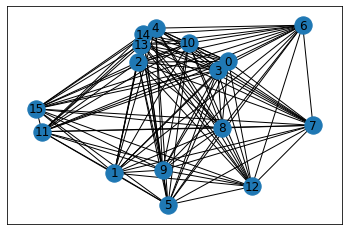

In [51]:
# testing min weight perfect matches differences 

import networkx as nx
import rpy2.robjects as robjects
import pandas as pd
import rpy2.robjects.numpy2ri
import numpy as np
import os
import time
import matplotlib.pyplot as plt
rpy2.robjects.numpy2ri.activate()


def min_matching(D):
    plainmatrix = 100000*D/D.max()
#     plainmatrix = D
    plainmatrix[np.diag_indices_from(plainmatrix)] = 0
    plainmatrix = plainmatrix.round(decimals=3)
    #print("plainmatrix: ",plainmatrix)
    G = nx.from_numpy_array(plainmatrix)
    
    nx.draw_networkx(G)
    
    set1 = nx.min_weight_matching(G)
    return set1

robjects.r('''
        # create a function `f`
        f2 <- function(D) {
            library(nbpMatching)
            plainmatrix <- 100000*D/max(as.vector(D))
  
  
  
            diag(plainmatrix) <- 0
            print("plainmatrix function :")
            print(plainmatrix)


            mdm <- distancematrix(plainmatrix)
            res <- nonbimatch(mdm)
            res
        }
        # call the function `f` with argument value 3
       #f(data)
        ''')
r_f2 = robjects.globalenv['f2']

b_symm2 = pd.read_csv("C:/Users/Eric Aragundi/Desktop/b_symm3.csv",header=None).to_numpy()


print(min_matching(b_symm2),'\n\n')
print(r_f2(b_symm2))
    